In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definicion de listas

vocabulary = ['alargue','automovil','casa','novedoso']
labels = []

labels.append(True)
labels.append(False)
labels.append(False)
labels.append(True)
labels.append(False)
labels.append(False)

emails_array = [
    'alargue alargue alargue automovil automovil automovil casa novedoso novedoso novedoso novedoso novedoso novedoso',
    'alargue automovil automovil automovil automovil casa casa casa casa casa casa casa novedoso',
    'alargue automovil automovil automovil automovil casa casa casa novedoso',
    'alargue alargue alargue alargue automovil automovil casa novedoso novedoso novedoso novedoso novedoso',
    'alargue automovil automovil automovil casa casa casa casa novedoso novedoso',
    'alargue alargue automovil automovil automovil automovil casa casa casa casa casa novedoso'
]

In [3]:
# PREGUNTA 1
p_SPAM = sum(labels) / len(labels)
p_HAM = 1 - p_SPAM

print('----------')
print('PREGUNTA 1')
print('----------')
print('')

print('Probabilidad de recibir un mail y que sea SPAM:')
print(p_SPAM)
print()

print('Probabilidad de recibir un mail y que sea HAM:')
print(p_HAM)

----------
PREGUNTA 1
----------

Probabilidad de recibir un mail y que sea SPAM:
0.3333333333333333

Probabilidad de recibir un mail y que sea HAM:
0.6666666666666667


In [4]:
count_vectorizer = CountVectorizer(vocabulary=vocabulary)
feature_matrix = count_vectorizer.fit_transform(emails_array)

In [5]:
def get_histogram_from_matrix(alpha, feature_matrix):
    # Alpha es para suavizar y evitar la probabilidad cero. Normalmente 1 (En este caso como no tenemos ninguna ocurrencia 0 no lo necesito)
    # Para calcular la probabilidad con fines académicos lo dejo en cero
    words_distribution_un = feature_matrix.sum(axis=0) + alpha
    words_distribution = words_distribution_un/(words_distribution_un.sum()) # + alpha*feature_matrix.shape[1])
    return words_distribution

spam_feature_matrix = feature_matrix[np.where(labels)[0],:]
ham_feature_matrix = feature_matrix[np.logical_not(labels),:]

print('Cantidad de palabras en cada clase')
print('SPAM:',spam_feature_matrix.sum(), 'HAM:',ham_feature_matrix.sum())
print()

# PREGUNTA 2
print('----------')
print('PREGUNTA 2')
print('----------')
print('')

# P(x_i/SPAM)
print('Probabilidad de ocurrencia de cada palabra si es SPAM:')
spam_words_distribution = get_histogram_from_matrix(0, spam_feature_matrix)
print(vocabulary)
print(spam_words_distribution)
print()

# P(x_i/HAM)
print('Probabilidad de ocurrencia de cada palabra si es HAM:')
ham_words_distribution = get_histogram_from_matrix(0, ham_feature_matrix)
print(vocabulary)
print(ham_words_distribution)

Cantidad de palabras en cada clase
SPAM: 25 HAM: 44

----------
PREGUNTA 2
----------

Probabilidad de ocurrencia de cada palabra si es SPAM:
['alargue', 'automovil', 'casa', 'novedoso']
[[ 0.28  0.2   0.08  0.44]]

Probabilidad de ocurrencia de cada palabra si es HAM:
['alargue', 'automovil', 'casa', 'novedoso']
[[ 0.11363636  0.34090909  0.43181818  0.11363636]]


In [6]:
def plot_bar_chart(P, vocabulary = None, title='title'):
    N = len(P)
    plt.figure(figsize=(20, 5)) # Tamaño del gráfico
    indexes = list(range(1, len(P) + 1))
    plt.bar(indexes, P, width=0.75, color='b') # Grafico
    plt.title(title)

    # Definición de indices
    if not vocabulary:
        string_indexes = [str(i) for i in indexes]
    else:
        string_indexes = [vocabulary[i-1] for i in indexes]
    plt.xlim([0,N+1])
    plt.xticks(indexes, string_indexes) 
    plt.xticks(rotation=60)
    plt.show()

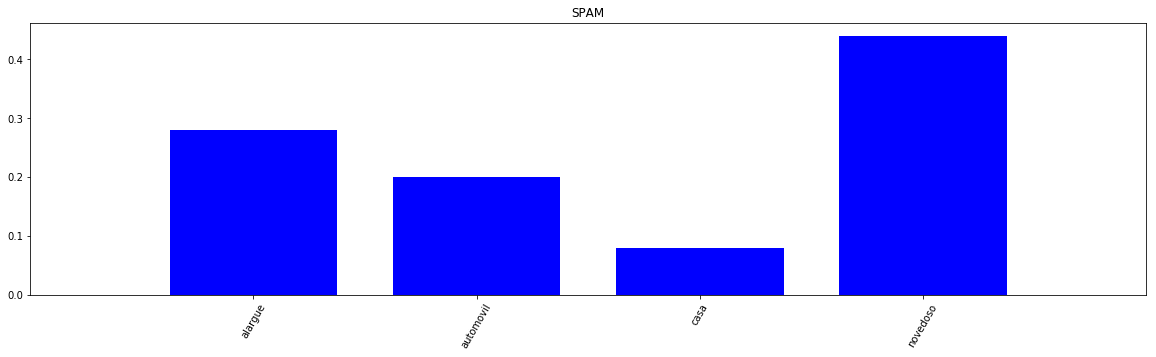

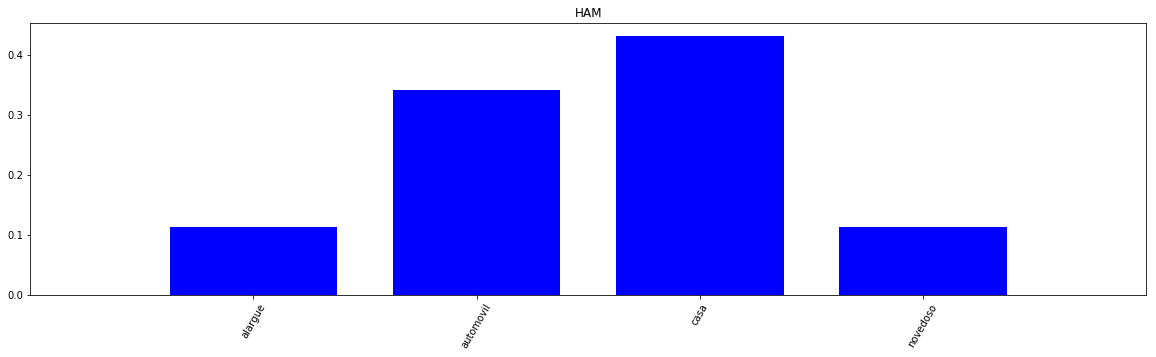

In [7]:
N = 4
plot_bar_chart(np.array(spam_words_distribution)[0][:N],
               vocabulary = vocabulary,
               title='SPAM')
plot_bar_chart(np.array(ham_words_distribution)[0][:N],
               vocabulary = vocabulary,
               title='HAM')

In [8]:
# PREGUNTA 3

# Calcular la probabilidad de que el siguiente mail sea SPAM
emails_array_test = ['alargue alargue alargue alargue automovil casa novedoso novedoso novedoso novedoso novedoso']

count_vectorizer = CountVectorizer(vocabulary=vocabulary)
feature_matrix_test = count_vectorizer.fit_transform(emails_array_test)

In [9]:
print('----------')
print('PREGUNTA 3')
print('----------')
print('')

print('Estimación de probabilidades de cada clase:')

non_zero_row = feature_matrix_test.nonzero()
print('SPAM: {0:.10f}'.format(spam_words_distribution[0, non_zero_row].prod()))
print('HAM: {0:.10f}'.format(ham_words_distribution[0, non_zero_row].prod()))
print()

print('Log likelihood:')
print('SPAM: ', np.log(spam_words_distribution[0, non_zero_row]).sum())
print('HAM: ', np.log(ham_words_distribution[0, non_zero_row]).sum())

----------
PREGUNTA 3
----------

Estimación de probabilidades de cada clase:
SPAM: 0.0000121161
HAM: 0.0000003170

Log likelihood:
SPAM:  -11.3209754879
HAM:  -14.9644004165


In [10]:
# El mail es SPAM!